In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import numpy as np 
import pandas as pd 


In [2]:
import scipy.stats 
from sklearn import mixture 

In [3]:
np.random.RandomState(seed = 123)

RandomState(MT19937) at 0x7F989F3B98D0

In [38]:
scipy.stats.bernoulli.rvs(1-0.6, size = 100, random_state=100)

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1])

In [5]:
np.random.RandomState(seed = 123)
idx = scipy.stats.bernoulli.rvs(1-0.2, size = 100, random_state=100)
idx

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1])

In [13]:
def generate_mix(n_total, f1, mu1, mu2, sigma1, sigma2, seed=123, plot_range =(-1.5, 1.5)):
    gen = np.random.RandomState(seed = seed)
    
    #assign each sample to one of the peaks 
    idx = scipy.stats.bernoulli.rvs(1-f1, size = n_total, random_state=gen)
    
    #set the Gaussian parameters for each sample 
    mu = np.array([mu1, mu2])[idx]
    sigma = np.array([sigma1, sigma2])[idx]
    
    #Generate each sample 
    X = scipy.stats.norm.rvs(mu, sigma, random_state = gen)
    
    if plot_range:
        bins = np.linspace(*plot_range, 30)
        plt.hist(X, bins, histtype ='stepfilled', alpha = 0.5, density = True)
        plt.hist(X, bins, histtype = 'step', color='k', lw = 1, density = True)
        grid = np.linspace(*plot_range, 201)
        if f1>0:
            pdf1 = scipy.stats.norm.pdf(grid, mu1, sigma1)
            plt.plot(grid, f1 *pdf1, lw =2)
        if f1 <1:
            pdf2 = scipy.stats.norm.pdf(grid, mu2, sigma2)
            plt.plot(grid, (1-f1) *pdf2, lw =2)
        plt.show()
    return X
            
            

In [14]:
# plt.hist?

In [21]:
n_gen = 300
# generate_mix(n_total, frac1, mu1, mu2, sigma1, sigma2, seed=123, plot_range =(-1.5, 1.5))

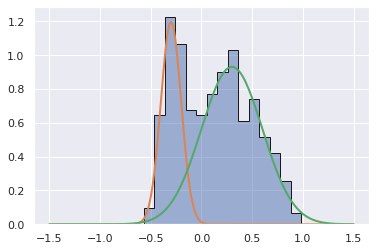

In [22]:
Da = generate_mix(n_gen, 0.3, -0.3,0.3, 0.1, 0.3)

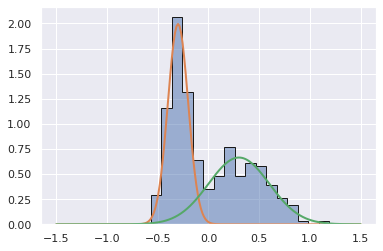

In [23]:
Db = generate_mix(n_gen, 0.5, -0.3, 0.3, 0.1, 0.3)

multivariate normal random variable

link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html

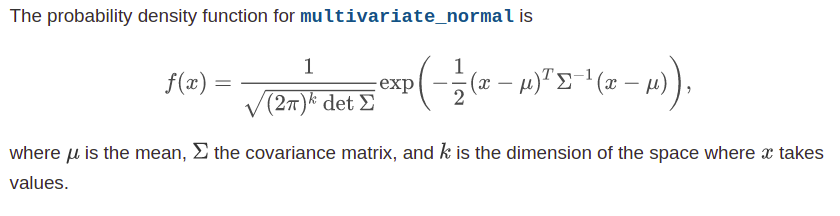

In [25]:
from IPython.display import Image
Image(filename='Screenshot from 2021-06-26 19-02-03.png')

In [26]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [27]:
x = np.linspace(0, 5, 100, endpoint=False)
y = multivariate_normal.pdf(x, mean=1.5, cov=0.5)
y.shape

(100,)

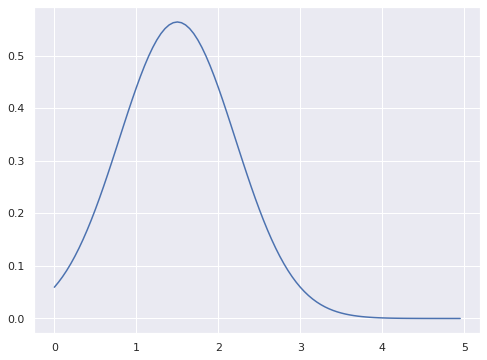

In [28]:
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(x, y)

In [29]:
np.linspace(0, 5, 10, endpoint=False)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [30]:
x, y = np.mgrid[-2:2:.02, -2:2:.02]
x, y


(array([[-2.  , -2.  , -2.  , ..., -2.  , -2.  , -2.  ],
        [-1.98, -1.98, -1.98, ..., -1.98, -1.98, -1.98],
        [-1.96, -1.96, -1.96, ..., -1.96, -1.96, -1.96],
        ...,
        [ 1.94,  1.94,  1.94, ...,  1.94,  1.94,  1.94],
        [ 1.96,  1.96,  1.96, ...,  1.96,  1.96,  1.96],
        [ 1.98,  1.98,  1.98, ...,  1.98,  1.98,  1.98]]),
 array([[-2.  , -1.98, -1.96, ...,  1.94,  1.96,  1.98],
        [-2.  , -1.98, -1.96, ...,  1.94,  1.96,  1.98],
        [-2.  , -1.98, -1.96, ...,  1.94,  1.96,  1.98],
        ...,
        [-2.  , -1.98, -1.96, ...,  1.94,  1.96,  1.98],
        [-2.  , -1.98, -1.96, ...,  1.94,  1.96,  1.98],
        [-2.  , -1.98, -1.96, ...,  1.94,  1.96,  1.98]]))

In [31]:
pos = np.dstack((x, y)) #Stack arrays in sequence depth wise (along third axis)
print(pos)

[[[-2.   -2.  ]
  [-2.   -1.98]
  [-2.   -1.96]
  ...
  [-2.    1.94]
  [-2.    1.96]
  [-2.    1.98]]

 [[-1.98 -2.  ]
  [-1.98 -1.98]
  [-1.98 -1.96]
  ...
  [-1.98  1.94]
  [-1.98  1.96]
  [-1.98  1.98]]

 [[-1.96 -2.  ]
  [-1.96 -1.98]
  [-1.96 -1.96]
  ...
  [-1.96  1.94]
  [-1.96  1.96]
  [-1.96  1.98]]

 ...

 [[ 1.94 -2.  ]
  [ 1.94 -1.98]
  [ 1.94 -1.96]
  ...
  [ 1.94  1.94]
  [ 1.94  1.96]
  [ 1.94  1.98]]

 [[ 1.96 -2.  ]
  [ 1.96 -1.98]
  [ 1.96 -1.96]
  ...
  [ 1.96  1.94]
  [ 1.96  1.96]
  [ 1.96  1.98]]

 [[ 1.98 -2.  ]
  [ 1.98 -1.98]
  [ 1.98 -1.96]
  ...
  [ 1.98  1.94]
  [ 1.98  1.96]
  [ 1.98  1.98]]]


In [35]:
#mu1 = 
rv = multivariate_normal([1.5, -1.3], [[3.0, -0.5], [-0.4, 0.9]])
rv.pdf(pos)

array([[0.0058027 , 0.00596343, 0.00612572, ..., 0.00013807, 0.00012928,
        0.000121  ],
       [0.00596113, 0.00612587, 0.00629218, ..., 0.00014009, 0.00013116,
        0.00012275],
       [0.00612302, 0.00629184, 0.00646225, ..., 0.00014212, 0.00013306,
        0.00012451],
       ...,
       [0.07584038, 0.07697989, 0.07809962, ..., 0.00015655, 0.00014478,
        0.00013383],
       [0.07576577, 0.07689931, 0.07801296, ..., 0.00015447, 0.00014285,
        0.00013204],
       [0.0756805 , 0.07680794, 0.07791535, ..., 0.00015239, 0.00014092,
        0.00013024]])

In [36]:
rv.pdf(pos).shape

(200, 200)

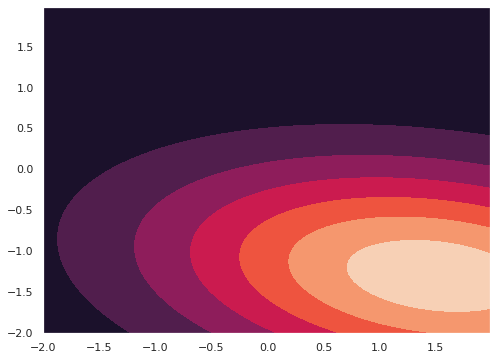

In [37]:
fig1, ax2 = plt.subplots(1,1, figsize =(8,6))
ax2.contourf(x, y, rv.pdf(pos))

Ref: 1. lecture note of UCI
     2. Numpy and Scipy
